## Data Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#loaded data as well as airport data with information about the airports from https://datahub.io/core/airport-codes 

df = pd.read_csv('../data/Train.csv')
airport_data = pd.read_csv('../data/airport_data.csv', dtype={'continent': 'string'}, na_values=[''])
airport_data['continent'].fillna('NA', inplace=True)
df.columns = df.columns.str.lower()

In [3]:
df.head()

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0


In [4]:
#delete rows with status DEL, SCH, RTR, DEP
df = df[~df['status'].isin(['DEL', 'SCH', 'RTR', 'DEP'])]

### New columns (Airline, Time)

In [5]:
#create new column airline
df['airline'] = df['ac'].apply(lambda x: x[:2])

In [6]:
# # Convert datop (date of flight) to datetime
# df['datop'] = pd.to_datetime(df['datop'], format="%Y-%m-%d", errors='coerce')

# Extract date from scheduled time departure (std) and confert to datetime and make new column std_date
df['std_date'] = pd.to_datetime(df['std']).dt.date

# Extract date from scheduled time departure (std) and confert to datetime and make new column std_date
df['sta_date'] = pd.to_datetime(df['std']).dt.date

# Extract time from scheduled time departure (std) and confert to datetime and make new column std_time
df['std_time'] = pd.to_datetime(df['std']).dt.strftime('%H:%M:%S')

# Extract time from scheduled time arrival (sta) and convert to datetime and make new column sta_time
df['sta_time'] = pd.to_datetime(df['sta'], format='%Y-%m-%d %H.%M.%S').dt.strftime('%H:%M:%S')

In [7]:
# Extract day of week for std_date and sta_date and make new colmuns std_day and sta_day
df['std_day'] = pd.to_datetime(df['std_date']).dt.day_name()
df['sta_day'] = pd.to_datetime(df['sta_date']).dt.day_name()

In [8]:
# Extract month for std_date and sta_date and make new colmuns std_month and sta_month
df['std_month'] = pd.to_datetime(df['std_date']).dt.month_name()
df['sta_month'] = pd.to_datetime(df['sta_date']).dt.month_name()

In [9]:
# # Extract day of the week
# df['day_of_week'] = df['datop'].dt.day_name()

In [10]:
# #Extract morning, midday, afternoon, evening, night from scheduled time departure (std) and scheduled time arrival (sta)
# def get_time_of_day(time_str):
#     hour = int(time_str.split(':')[0])
#     if 0 <= hour < 6:
#         return 'night'
#     elif 6 <= hour < 12:
#         return 'morning'
#     elif 12 <= hour < 14:
#         return 'midday'
#     elif 14 <= hour < 17:
#         return 'afternoon'
#     elif 17 <= hour < 21:
#         return 'evening'
#     else:
#         return 'night'

# df['time_day_std'] = df['std_time'].apply(get_time_of_day)
# df['time_day_sta'] = df['sta_time'].apply(get_time_of_day)



In [11]:
#make column for time in decimal for std and sta
def time_to_decimal(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h + m / 60 + s / 3600

df['sta_time_dec'] = df['sta_time'].apply(time_to_decimal).round(1)
df['std_time_dec'] = df['std_time'].apply(time_to_decimal).round(1)

In [12]:
df.head()

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target,...,std_date,sta_date,std_time,sta_time,std_day,sta_day,std_month,sta_month,sta_time_dec,std_time_dec
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,...,2016-01-03,2016-01-03,10:30:00,12:55:00,Sunday,Sunday,January,January,12.9,10.5
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,...,2016-01-13,2016-01-13,15:05:00,16:55:00,Wednesday,Wednesday,January,January,16.9,15.1
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,...,2016-01-16,2016-01-16,04:10:00,06:45:00,Saturday,Saturday,January,January,6.8,4.2
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,...,2016-01-17,2016-01-17,14:10:00,17:00:00,Sunday,Sunday,January,January,17.0,14.2
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,...,2016-01-17,2016-01-17,14:30:00,15:50:00,Sunday,Sunday,January,January,15.8,14.5


### Merge new information of airport data with df

In [13]:
# Searched for missing information in airport_data and added to airport_data file
airport_info = [
    {'iata_code': 'AMM', 'continent': 'AS', 'iso_country': 'JO', 'type': 'large_airport'},
    {'iata_code': 'BEY', 'continent': 'AS', 'iso_country': 'LB', 'type': 'large_airport'},
    {'iata_code': 'DOH', 'continent': 'AS', 'iso_country': 'QA', 'type': 'large_airport'},
    {'iata_code': 'EBL', 'continent': 'AS', 'iso_country': 'IQ', 'type': 'large_airport'},
    {'iata_code': 'IEV', 'continent': 'EU', 'iso_country': 'UA', 'type': 'medium_airport'},
    {'iata_code': 'JED', 'continent': 'AS', 'iso_country': 'SA', 'type': 'large_airport'},
    {'iata_code': 'KBP', 'continent': 'EU', 'iso_country': 'UA', 'type': 'large_airport'},
    {'iata_code': 'KRR', 'continent': 'EU', 'iso_country': 'RU', 'type': 'large_airport'},
    {'iata_code': 'LED', 'continent': 'EU', 'iso_country': 'RU', 'type': 'large_airport'},
    {'iata_code': 'MED', 'continent': 'AS', 'iso_country': 'SA', 'type': 'medium_airport'},
    {'iata_code': 'SKX', 'continent': 'EU', 'iso_country': 'RU', 'type': 'small_airport'},
    {'iata_code': 'SVO', 'continent': 'EU', 'iso_country': 'RU', 'type': 'large_airport'},
    {'iata_code': 'SXF', 'continent': 'EU', 'iso_country': 'DE', 'type': 'large_airport'},
    {'iata_code': 'VKO', 'continent': 'EU', 'iso_country': 'RU', 'type': 'large_airport'},
    {'iata_code': 'VOG', 'continent': 'EU', 'iso_country': 'RU', 'type': 'medium_airport'}
]

# Convert airport_info to DataFrame
new_info_df = pd.DataFrame(airport_info)

# Update existing rows or append new rows
for index, row in new_info_df.iterrows():
    iata_code = row['iata_code']
    if iata_code in airport_data['iata_code'].values:
        airport_data.loc[airport_data['iata_code'] == iata_code, ['continent', 'iso_country', 'type']] = row[['continent', 'iso_country', 'type']]
    else:
        airport_data = pd.concat([airport_data, row.to_frame().T], ignore_index=True)

airport_data.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,icao_code,iata_code,gps_code,local_code,coordinates
0,00A,heliport,Total RF Heliport,11.0,NA,US,US-PA,Bensalem,NaN,NaN,K00A,00A,"40.070985, -74.933689"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NA,US,US-KS,Leoti,NaN,NaN,00AA,00AA,"38.704022, -101.473911"
2,00AK,small_airport,Lowell Field,450.0,NA,US,US-AK,Anchor Point,NaN,NaN,00AK,00AK,"59.947733, -151.692524"
3,00AL,small_airport,Epps Airpark,820.0,NA,US,US-AL,Harvest,NaN,NaN,00AL,00AL,"34.86479949951172, -86.77030181884766"
4,00AN,small_airport,Katmai Lodge Airport,80.0,NA,US,US-AK,King Salmon,NaN,NaN,00AN,00AN,"59.093287, -156.456699"


In [14]:
#select interesting columns from airport_data
airport_data = airport_data[['continent', 'iso_country', 'type', 'iata_code']]

In [15]:
#merge airport data with train data
df = df.merge(airport_data, left_on='depstn', right_on='iata_code', how='left')
df = df.merge(airport_data, left_on='arrstn', right_on='iata_code', how='left', suffixes=('_dep', '_arr'))
df = df.drop(columns=['iata_code_dep', 'iata_code_arr'])
df.head()

,id,datop,fltid,depstn,arrstn,std,sta,status,ac,target,...,std_month,sta_month,sta_time_dec,std_time_dec,continent_dep,iso_country_dep,type_dep,continent_arr,iso_country_arr,type_arr
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,...,January,January,12.9,10.5,AF,MA,large_airport,AF,TN,large_airport
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,...,January,January,16.9,15.1,EU,IT,large_airport,AF,TN,large_airport
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,...,January,January,6.8,4.2,AF,TN,large_airport,EU,TR,large_airport
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,...,January,January,17.0,14.2,AF,TN,medium_airport,EU,FR,medium_airport
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,...,January,January,15.8,14.5,AF,TN,large_airport,AF,DZ,large_airport


### New Columns based on Airport data

In [16]:
# Make new features with DP Country = Arr Country
df['is_same_country'] = np.where(df['iso_country_dep'].isna() | df['iso_country_arr'].isna(), np.nan, df['iso_country_dep'] == df['iso_country_arr'])

In [17]:
#change NA to NOA, so it doesnt get recodcnized as missing value
df[['continent_dep', 'continent_arr']] = df[['continent_dep', 'continent_arr']].replace('NA', 'NOA')

In [18]:
df.columns

Index(['id', 'datop', 'fltid', 'depstn', 'arrstn', 'std', 'sta', 'status',
       'ac', 'target', 'airline', 'std_date', 'sta_date', 'std_time',
       'sta_time', 'std_day', 'sta_day', 'std_month', 'sta_month',
       'sta_time_dec', 'std_time_dec', 'continent_dep', 'iso_country_dep',
       'type_dep', 'continent_arr', 'iso_country_arr', 'type_arr',
       'is_same_country'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93679 entries, 0 to 93678
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               93679 non-null  object 
 1   datop            93679 non-null  object 
 2   fltid            93679 non-null  object 
 3   depstn           93679 non-null  object 
 4   arrstn           93679 non-null  object 
 5   std              93679 non-null  object 
 6   sta              93679 non-null  object 
 7   status           93679 non-null  object 
 8   ac               93679 non-null  object 
 9   target           93679 non-null  float64
 10  airline          93679 non-null  object 
 11  std_date         93679 non-null  object 
 12  sta_date         93679 non-null  object 
 13  std_time         93679 non-null  object 
 14  sta_time         93679 non-null  object 
 15  std_day          93679 non-null  object 
 16  sta_day          93679 non-null  object 
 17  std_month   

## drop unneccessary columns

In [20]:
#drop columns that are not needed
df.drop(columns=['datop', 'fltid', 'arrstn', 'std', 'sta', 'status', 'std_date', 'sta_date', 'std_time', 'sta_time'], inplace=True)

#maybe drop: 'iso_country_arr', 'type_arr'

### look for correlations between variables

In [21]:
# # Factorize categorical variables
# df_encoded = df.copy()
# for col in df.select_dtypes(include=['object']).columns:
#     df_encoded[col], _ = pd.factorize(df[col])

# # Compute correlation matrix
# correlation_matrix = df_encoded.corr()

# # Plot the heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
# plt.title("Correlation Matrix (Numerical + Encoded Categorical)")
# plt.show()

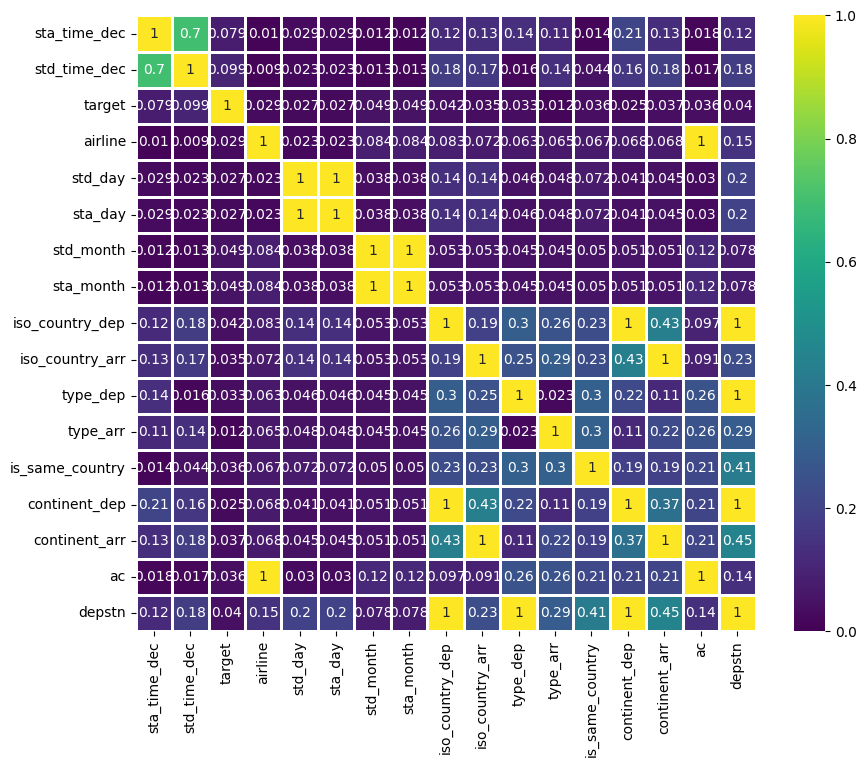

In [22]:
import optbinning as op
from scipy import stats

# Define numerical and categorical features
numerical_features = [
    'sta_time_dec',
    'std_time_dec',
    'target'
]

categorical_features = [
    'airline',
    'std_day',
    'sta_day',
    'std_month',
    'sta_month',
    'iso_country_dep',
    'iso_country_arr',
    'type_dep',
    'type_arr',
    'is_same_country',
    'continent_dep', 
    'continent_arr',
    'ac',
    'depstn'
]

# Function to compute Cramer's correlation between two categorical columns
def cat_cat_correlation(df_, cat_col1, cat_col2):
    crosstab = pd.crosstab(df_[cat_col1], df_[cat_col2])
    chi_sqr = stats.chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    r, k = crosstab.shape
    phi_sqr_corr = max(0, chi_sqr/n - ((k-1)*(r-1))/(n-1))    
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    
    # Check to avoid division by zero
    denominator = min((k_corr-1), (r_corr-1))
    if denominator <= 0:
        result = 0
    else:
        result = np.sqrt(phi_sqr_corr / denominator)
    
    return round(result, 3)

# Function to compute correlation between a categorical and a numerical column
def cat_num_correlation(df_, cat_col, num_col):
    # One-hot encode categorical variable
    _df = pd.get_dummies(df_, columns=[cat_col])
    
    # Compute correlation with each dummy variable
    correlations = []
    for dummy_col in _df.columns:
        if dummy_col.startswith(cat_col):
            correlations.append(round(_df[num_col].corr(_df[dummy_col]), 3))
    
    # Return the maximum correlation as a proxy
    return max(correlations) if correlations else 0

# Function to compute correlation between two numerical columns
def num_num_correlation(df_, num_col1, num_col2):
    return round(df_[num_col1].corr(df_[num_col2]), 3)

# Compute correlations between all features
all_features = numerical_features + categorical_features
correlation_matrix = pd.DataFrame(index=all_features, columns=all_features)

for i, feature1 in enumerate(all_features):
    for j, feature2 in enumerate(all_features):
        if feature1 in numerical_features and feature2 in numerical_features:
            correlation_matrix.loc[feature1, feature2] = num_num_correlation(df, feature1, feature2)
        elif feature1 in categorical_features and feature2 in categorical_features:
            correlation_matrix.loc[feature1, feature2] = cat_cat_correlation(df, feature1, feature2)
        else:
            if feature1 in categorical_features and feature2 in numerical_features:
                correlation_matrix.loc[feature1, feature2] = cat_num_correlation(df, feature1, feature2)
            elif feature1 in numerical_features and feature2 in categorical_features:
                correlation_matrix.loc[feature1, feature2] = cat_num_correlation(df, feature2, feature1)

# Convert to numeric for heatmap plotting
correlation_matrix = correlation_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(10, 8), dpi=100)
sns.heatmap(data=correlation_matrix,
            cmap='viridis',
            linecolor='white',
            linewidth=1,
            annot=True,
            vmin=0,
            vmax=1)
plt.show()

Remove Continent as it is correlating with other features, also drop sta_time_dec due to correlation with std_time_dec

### Dropping columns that correlate

In [23]:
#drop columns that are not needed
df.drop(columns=['continent_dep', 'continent_arr', 'sta_time_dec', 'airline', 'depstn'], inplace=True)

#maybe drop: 'iso_country_arr', 'type_arr'

### Change type of variable

In [24]:
#change is_same_country to object
df['is_same_country'] = df['is_same_country'].astype(object)

In [25]:
#replace 0 and 1 with False and True in is_same_country
df['is_same_country'] = df['is_same_country'].replace({0: False, 1: True})

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93679 entries, 0 to 93678
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               93679 non-null  object 
 1   ac               93679 non-null  object 
 2   target           93679 non-null  float64
 3   std_day          93679 non-null  object 
 4   sta_day          93679 non-null  object 
 5   std_month        93679 non-null  object 
 6   sta_month        93679 non-null  object 
 7   std_time_dec     93679 non-null  float64
 8   iso_country_dep  93679 non-null  object 
 9   type_dep         93679 non-null  object 
 10  iso_country_arr  93679 non-null  object 
 11  type_arr         93679 non-null  object 
 12  is_same_country  93679 non-null  bool   
dtypes: bool(1), float64(2), object(10)
memory usage: 8.7+ MB


## Drop outliers in target?

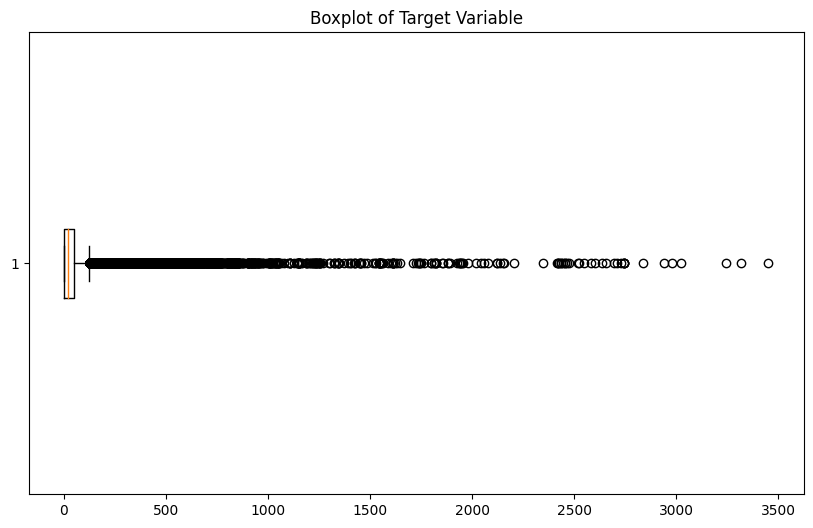

In [27]:
# Plot boxplot of target variable
plt.figure(figsize=(10,6))
plt.boxplot(df['target'], vert=False)
plt.title('Boxplot of Target Variable')
plt.show()

In [28]:
# # Remove rows where the target variable is above 2000
# df = df[df['target'] <= 2000]

# # Display the first few rows of the filtered DataFrame
# print(df.head())

### Save file

In [29]:
df.to_csv('../data/train_cleaned.csv', index=False)

### interesting features would be (need to impute some rows, missing values):
- iso_country_dep
- iso_country_arr
- continent_arr
- continent_dep
- is_same_country
- type_dep
- type_arr
- days of week
- airline
